In [1]:
import numpy as np
import nest
import matplotlib.pyplot as plt

from params import pyr_hcamp_deco2012
from params import int_hcamp_deco2012
from scripts import visualizations, preprocessing


              -- N E S T --
  Copyright (C) 2004 The NEST Initiative

 Version: 3.6.0
 Built: Sep 28 2023 11:53:34

 This program is provided AS IS and comes with
 NO WARRANTY. See the file LICENSE for details.

 Problems or suggestions?
   Visit https://www.nest-simulator.org

 Type 'nest.help()' to find out more about NEST.



In [2]:
#Runtime
runtime = 2000

#Gamma rate
gamma_rate = 40

#Theta rate 
theta_rate = 7

nest.SetKernelStatus({"resolution": 1})


Dec 06 14:46:31 correlation_detector [Info]: 
    Default for delta_tau changed from 0.5 to 5 ms

Dec 06 14:46:31 correlomatrix_detector [Info]: 
    Default for delta_tau changed from 0.5 to 5 ms

Dec 06 14:46:31 correlospinmatrix_detector [Info]: 
    Default for delta_tau changed from 0.1 to 1 ms

Dec 06 14:46:31 SimulationManager::set_status [Info]: 
    Temporal resolution changed from 0.1 to 1 ms.



Dec 06 14:46:31 NodeManager::prepare_nodes [Info]: 
    Preparing 16 nodes for simulation.

Dec 06 14:46:31 SimulationManager::start_updating_ [Info]: 
    Number of local nodes: 16
    Simulation time (ms): 200
    Number of OpenMP threads: 1
    Not using MPI

Dec 06 14:46:31 SimulationManager::run [Info]: 
    Simulation finished.
[array([  8.,   9.,  21.,  29.,  63.,  97., 101., 134., 145., 157., 164.,
       171., 189.]), array([  7.,   9.,  43.,  51.,  79., 126., 154., 174., 178., 198.]), array([ 57.,  90., 175., 183., 189.]), array([185., 187.]), array([  5.,  42.,  72.,  96., 119., 161., 165., 168., 185., 192.]), array([ 73.,  97., 172., 191.]), array([ 16.,  19.,  39.,  56.,  64.,  76.,  86.,  88., 102., 130., 132.,
       139., 168., 199.]), array([  9.,  18.,  24.,  42.,  50.,  97., 116., 119.]), array([ 55., 114., 120., 137., 184.]), array([  4.,  46.,  47.,  75., 132., 148.])]


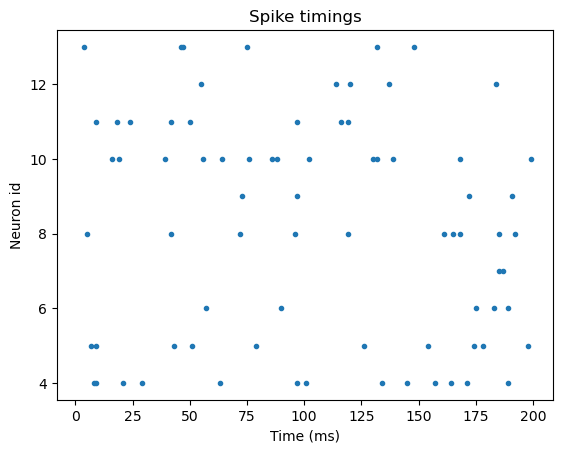

In [3]:
pyr = nest.Create('iaf_psc_alpha', n=3, params=pyr_hcamp_deco2012.params)

ec_input = nest.Create('poisson_generator', n=10)
ec_input.set(rate=gamma_rate)
ec_parrot = nest.Create('parrot_neuron', n=1)
nest.Connect(ec_input[0], ec_parrot[0])

nest.Connect(ec_parrot, pyr, syn_spec={'weight': 35})

Vm_recorder = nest.Create('multimeter')
Vm_recorder.set(record_from=['V_m'])
nest.Connect(Vm_recorder, pyr)
spike_recorder = nest.Create('spike_recorder')
nest.Connect(ec_input, spike_recorder)

nest.Simulate(200)

spikes = nest.GetStatus(spike_recorder, "events")[0]
senders = spikes["senders"]
times = spikes["times"]
results = [times[senders == neuron_id] for neuron_id in ec_input]
visualizations.plot_spikes_from_device(spike_recorder)



In [4]:
results = preprocessing.simulation_results_to_spike_trains(results, runtime)
